<h1>Box Plot Visualization

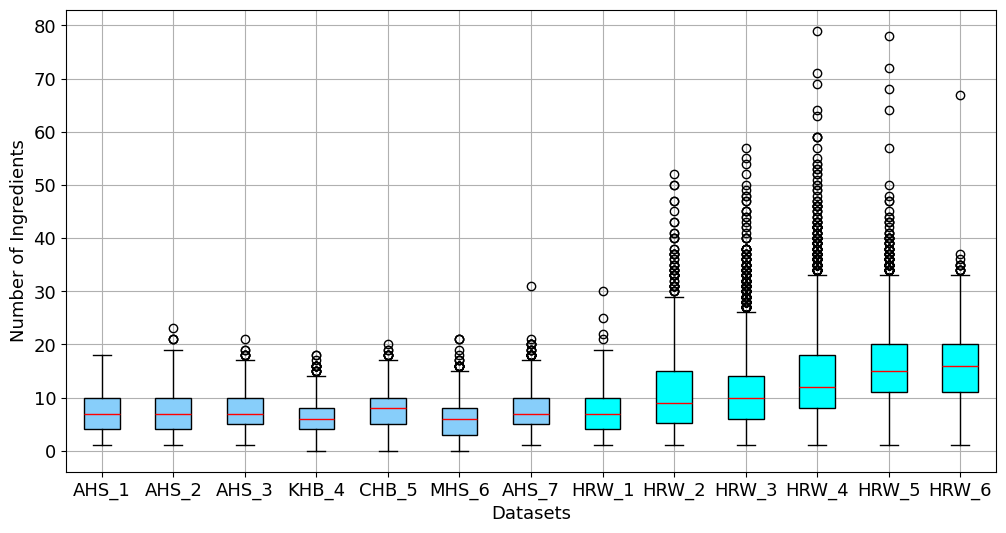

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

def count_ingredients(file_path):
    df = pd.read_csv(file_path)
    
    df['ingredient_count'] = df['Ingredients'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
    
    average_ingredient_count = df['ingredient_count'].mean()
    
    return df['ingredient_count'], average_ingredient_count

file_paths = ['1910_count.csv', '1912_count.csv', '1925_count.csv', '1932_count.csv','1938_count.csv','1939_count.csv','1940_count.csv','1941_1950_count.csv', '1951_1960_count.csv', '1961_1970_count.csv', '1971_1980_count.csv', '1981_1990_count.csv', '1991_2000_count.csv']
file_names = ['AHS_1', 'AHS_2', 'AHS_3', 'KHB_4', 'CHB_5', 'MHS_6', 'AHS_7','HRW_1', 'HRW_2', 'HRW_3', 'HRW_4','HRW_5', 'HRW_6']

ingredient_counts_per_file = []
average_counts = []

for file_path in file_paths:
    counts, avg_count = count_ingredients(file_path)
    ingredient_counts_per_file.append(counts)
    average_counts.append(avg_count)

highlighted_files = {'HRW_1', 'HRW_2', 'HRW_3', 'HRW_4','HRW_5', 'HRW_6'}

plt.figure(figsize=(12, 6))
box = plt.boxplot(ingredient_counts_per_file, tick_labels=file_names, patch_artist=True, medianprops=dict(color='red'))

for i, (box_patch, flier) in enumerate(zip(box['boxes'], box['fliers'])):
    if file_names[i] in highlighted_files:
        box_patch.set_facecolor('aqua') 
    else:
        box_patch.set_facecolor('lightskyblue') 
       

plt.rcParams.update({'font.size': 13})
plt.xlabel('Datasets')
plt.ylabel('Number of Ingredients')
plt.grid(True)
plt.savefig('Box_plot.png')
plt.show()
